# How long does it take to get a message if the inquiry gets requected? How long if it is certified?

Firstly, let's take a closer look into the data.

In [41]:
import pandas as pd

The data was read. The necessary columns are:
- case_status
- case_received_date
- decision_date

We'll look at each of them.

In [42]:
col_list = ["case_status", "case_received_date", "decision_date"]

visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
visas_df.head()

,case_received_date,case_status,decision_date
0,NaN,Certified,2012-02-01
1,NaN,Denied,2011-12-21
2,NaN,Certified,2011-12-01
3,NaN,Certified,2011-12-01
4,NaN,Certified,2012-01-26


How much values do we have in the seperate columns?

case_received_date
239091/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows


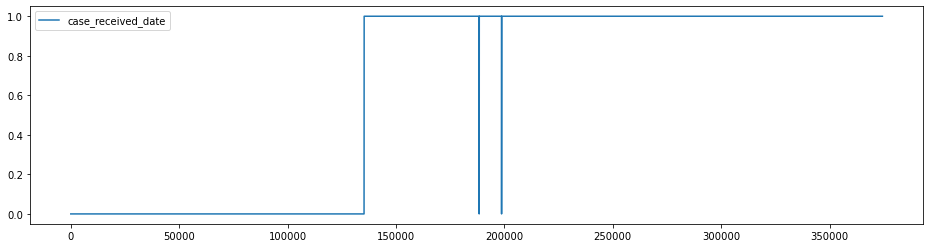


case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


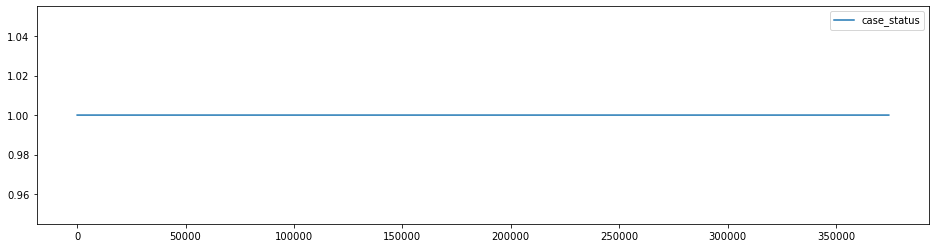


decision_date
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows


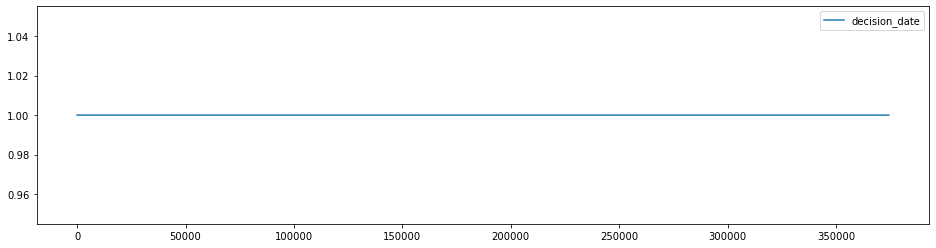

In [44]:
import modules
modules.print_count_of_values_relation(visas_df, True, True)

In [45]:
visas_df['case_received_date'].notna()

0         False
1         False
2         False
3         False
4         False
          ...  
374357     True
374358     True
374359     True
374360     True
374361     True
Name: case_received_date, Length: 374362, dtype: bool

<AxesSubplot:>

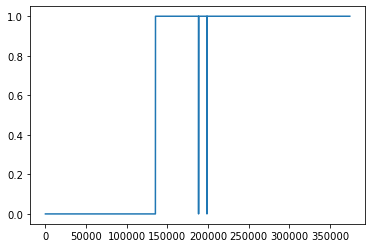

In [46]:
visas_df['case_received_date'].notna().astype(int).plot(x='index')

## case_status

The first column is case_status.

In [47]:
visas_df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

Perfect. This column looks clean. There's no further work to do here.

## case_received_date

The next one is case_received_date.

In [48]:
visas_df['case_received_date'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: case_received_date, dtype: object

That doesn't look very good....

In [49]:
visas_df['case_received_date'].value_counts()


2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2009-01-16      1
2010-08-25      1
2010-11-12      1
2009-03-10      1
2011-04-14      1
Name: case_received_date, Length: 2180, dtype: int64

In [50]:
visas_df['case_received_date'] = pd.to_datetime(visas_df['case_received_date'])

In [51]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   case_received_date  239091 non-null  datetime64[ns]
 1   case_status         374362 non-null  object        
 2   decision_date       374362 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.6+ MB


In [52]:
visas_df['case_received_date']

0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
374357   2016-12-29
374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
Name: case_received_date, Length: 374362, dtype: datetime64[ns]

In [53]:
visas_df['case_received_date'].value_counts()

2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2011-12-07      1
2010-05-19      1
2009-05-06      1
2008-10-29      1
2010-07-14      1
Name: case_received_date, Length: 2180, dtype: int64

In [54]:
visas_df['case_received_date'].count()

239091

Let's take a quick look at the plausability of the entries.


In [55]:
visas_df['case_received_date'].nsmallest(10)

135468   2006-06-21
244931   2007-07-06
252985   2007-07-20
371796   2007-08-17
135482   2007-09-04
218244   2007-10-19
329959   2007-11-15
135489   2007-12-07
250909   2007-12-07
239942   2007-12-26
Name: case_received_date, dtype: datetime64[ns]

In [56]:
visas_df['case_received_date'].nlargest(10)

374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
374152   2016-12-29
374153   2016-12-29
374357   2016-12-29
373698   2016-12-28
373742   2016-12-28
373743   2016-12-28
Name: case_received_date, dtype: datetime64[ns]

The values are looking plausable.

## decision_date

In [57]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   case_received_date  239091 non-null  datetime64[ns]
 1   case_status         374362 non-null  object        
 2   decision_date       374362 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.6+ MB


In [58]:
visas_df['decision_date'] = pd.to_datetime(visas_df['decision_date'])

In [59]:
visas_df['received_to_decision'] = visas_df['decision_date']-visas_df['case_received_date']

In [60]:
visas_df.sample(20)

,case_received_date,case_status,decision_date,received_to_decision
332506,2016-05-27,Certified,2016-08-10,75 days
289084,2015-11-17,Certified,2016-04-15,150 days
121882,NaT,Certified,2014-06-13,NaT
262948,2015-08-11,Certified-Expired,2016-02-02,175 days
309635,2016-02-04,Certified,2016-06-09,126 days
145663,2013-08-06,Denied,2015-03-13,584 days
229973,2015-04-29,Certified-Expired,2015-10-23,177 days
331947,2016-05-18,Certified,2016-08-08,82 days
149634,2014-03-27,Withdrawn,2014-10-20,207 days
347372,2016-07-13,Certified,2016-09-23,72 days


Delete all rows without a case_received_date.

In [61]:
visas_df.dropna(subset = ["case_received_date"], inplace=True)

In [62]:

visas_df["case_received_date"].size

239091

In [63]:
visas_df['received_to_decision_days'] = visas_df['received_to_decision'].dt.days

In [64]:
visas_df.groupby('case_status')['received_to_decision_days'].mean().sort_values()

case_status
Withdrawn            105.814246
Certified            172.393605
Certified-Expired    222.298922
Denied               517.754714
Name: received_to_decision_days, dtype: float64

In [65]:

visas_df.groupby('case_status')['received_to_decision_days'].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,120969.0,172.393605,150.296833,3.0,87.0,125.0,202.0,3082.0
Certified-Expired,95570.0,222.298922,136.983325,79.0,150.0,173.0,198.0,2852.0
Denied,12781.0,517.754714,505.650797,0.0,201.0,399.0,631.0,3413.0
Withdrawn,9771.0,105.814246,168.466313,0.0,1.0,29.0,146.0,3092.0



Klappt die Zertifizierung mittlerweile schneller?

In [66]:

pv = pd.pivot_table(visas_df, index=visas_df['case_received_date'].dt.month, columns=visas_df['case_received_date'].dt.year,
                    values='received_to_decision_days', aggfunc='mean')


pv

case_received_date,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
case_received_date,,,,,,,,,,,
1,NaN,NaN,2836.333333,2236.909091,2083.500000,1916.277778,1422.045455,812.944181,527.519679,216.335494,134.308332
2,NaN,NaN,NaN,2492.000000,2094.521739,1850.560000,1272.166667,778.270270,487.185151,212.958772,123.704211
3,NaN,NaN,2772.500000,2453.909091,2081.655172,1681.375000,1521.125000,704.153846,452.158163,202.841952,114.444486
4,NaN,NaN,2845.000000,2347.571429,2107.000000,1714.745763,1289.000000,598.230337,407.128838,197.457957,105.319184
5,NaN,NaN,2903.000000,2272.416667,2076.366667,1561.388350,1058.447368,619.769033,242.638362,199.172264,95.656284
6,3355.0,NaN,2516.000000,2254.466667,2071.583333,1595.405405,1177.329843,620.434290,237.121475,189.808742,82.130802
7,NaN,3086.50,2516.250000,2204.739130,2058.000000,1662.450000,1196.695312,621.519431,235.558158,181.954651,79.544264
8,NaN,3413.00,2516.857143,2224.888889,1965.333333,1600.042553,1208.630000,617.300962,213.739848,170.585338,73.274256
9,NaN,2778.00,2482.500000,2154.968750,2060.384615,1531.363636,906.277108,604.379549,207.402957,161.032614,67.414445


<AxesSubplot:xlabel='case_received_date'>

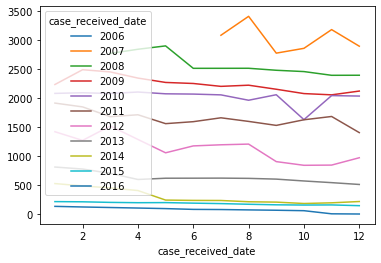

In [67]:

pv.plot()

In [68]:

visas_df["case_received_date"].dt.year.value_counts()

2015    87102
2016    72179
2014    63117
2013    14521
2012      889
2011      573
2010      404
2009      215
2008       80
2007       10
2006        1
Name: case_received_date, dtype: int64

In [73]:
visas_df = visas_df[visas_df["case_received_date"].dt.year > 2012]  

In [74]:
df3['test'].value_counts()

2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2013-10-09      1
2013-07-14      1
2013-05-04      1
2013-03-03      1
2016-12-11      1
Name: test, Length: 1407, dtype: int64

In [75]:

pv = pd.pivot_table(visas_df, index=visas_df['case_received_date'].dt.month, columns=visas_df['case_received_date'].dt.year,
                    values='received_to_decision_days', aggfunc='mean')


pv

case_received_date,2013,2014,2015,2016
case_received_date,,,,
1,812.944181,527.519679,216.335494,134.308332
2,778.270270,487.185151,212.958772,123.704211
3,704.153846,452.158163,202.841952,114.444486
4,598.230337,407.128838,197.457957,105.319184
5,619.769033,242.638362,199.172264,95.656284
6,620.434290,237.121475,189.808742,82.130802
7,621.519431,235.558158,181.954651,79.544264
8,617.300962,213.739848,170.585338,73.274256
9,604.379549,207.402957,161.032614,67.414445


<AxesSubplot:xlabel='case_received_date'>

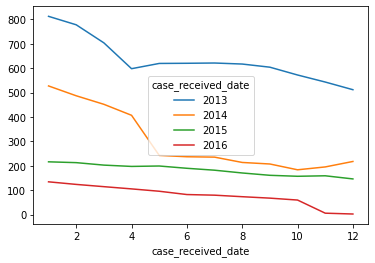

In [76]:

pv.plot()